# Avaliação teste 

## Geração energética de 2000 à 2018 para previsão de anos seguintes
## Análise de nível estatístico


#### Criador: Marcelo Chalub Llanco
#### Ultima edição: 11/03/2024

### 1ª Fase - Importação das bibliotecas e limpeza dos dados

In [96]:
#Importando as bibliotecas que serão utilizadas
%config Completer.use_jedi = False
import pandas as pd
import datetime
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import glob
from pmdarima.arima import auto_arima

In [97]:
#from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
#from pandas.plotting import autocorrelation_plot

In [98]:
#Diretório dos arquivos CSV
diretorio = glob.glob(r'C:\Users\marce\Downloads\Bootcamp\Data\*.csv')

In [99]:
#Lista para armazenar os DF's
dfs = []

In [100]:
#Armazenar os arquivos na lista
for arquivo in diretorio:
    df_un = pd.read_csv(arquivo,delimiter = ';', index_col = 0, parse_dates = True, usecols=['din_instante','nom_subsistema','nom_estado','nom_tipousina','nom_usina','val_geracao'])
    dfs.append(df_un)

In [101]:
#Concatenando os dfs em uma lista só
df = pd.concat(dfs)

In [102]:
#Criação da coluna 'ano' e 'mes'
df['ano'] = df.index.year
df['mes'] = df.index.month
df

,nom_subsistema,nom_estado,nom_tipousina,nom_usina,val_geracao,ano,mes
din_instante,,,,,,,
2000-01-01 00:00:00,NORTE,PARA,HIDROELÉTRICA,Tucuruí,2422.500,2000,1
2000-01-01 00:00:00,NORDESTE,ALAGOAS,HIDROELÉTRICA,Xingó,1995.600,2000,1
2000-01-01 00:00:00,NORDESTE,BAHIA,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Chesf,13.000,2000,1
2000-01-01 00:00:00,NORDESTE,BAHIA,HIDROELÉTRICA,Apolônio Sales,202.500,2000,1
2000-01-01 00:00:00,NORDESTE,BAHIA,HIDROELÉTRICA,Paulo Afonso II,269.800,2000,1
...,...,...,...,...,...,...,...
2018-12-31 23:00:00,SUDESTE,SAO PAULO,TÉRMICA,Colorado,21.000,2018,12
2018-12-31 23:00:00,SUDESTE,SAO PAULO,TÉRMICA,Guarani Cruz Alta,13.000,2018,12
2018-12-31 23:00:00,SUDESTE,TOCANTINS,HIDROELÉTRICA,São Salvador,119.600,2018,12


### 2ª Fase - Análise exploratória dos dados

In [103]:
#Somatório anual
df_sum = df.groupby('ano').sum()['val_geracao']
df_sum

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\1845029760.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = df.groupby('ano').sum()['val_geracao']


ano
2000    3.566150e+08
2001    3.262819e+08
2002    3.467247e+08
2003    3.654575e+08
2004    3.850901e+08
2005    4.005254e+08
2006    4.163279e+08
2007    4.374887e+08
2008    4.487618e+08
2009    4.443989e+08
2010    4.763252e+08
2011    4.937179e+08
2012    5.121514e+08
2013    5.134668e+08
2014    5.379187e+08
2015    5.361120e+08
2016    5.271116e+08
2017    5.482011e+08
2018    5.529630e+08
Name: val_geracao, dtype: float64

(0.0, 564297021.72891)

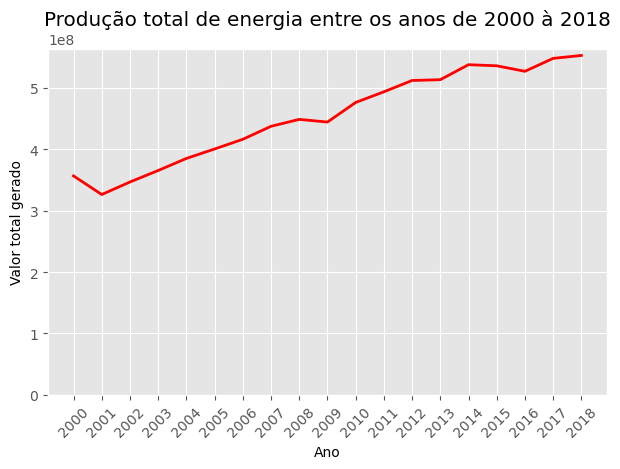

In [104]:
#Verificando padrão a partir do Gráfico de linhas da produção total x ano
plt.plot(df_sum,color = 'red',linewidth=2)
plt.style.use('ggplot')
plt.title('Produção total de energia entre os anos de 2000 à 2018')
plt.xlabel('Ano')
plt.xticks(range(df_sum.index.min(), df_sum.index.max() + 1),rotation = 45)
plt.ylabel('Valor total gerado')
plt.grid(True)
plt.tight_layout()
plt.ylim(0)
#plt.savefig('grafico1.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

In [105]:
#Descoberta de quais valores tem no 'nom_tipousina'
tipos_de_usina = df['nom_tipousina'].value_counts()
tipos_de_usina

HIDROELÉTRICA    24848104
TÉRMICA          15168761
EOLIELÉTRICA      4912716
NUCLEAR            326650
FOTOVOLTAICA       187940
BOMBEAMENTO         17686
Name: nom_tipousina, dtype: int64

In [106]:
#Fazendo a tabela com a divisão temporal dos dados de acordo com o tipo de usina
usina_temporal = df.groupby(['nom_tipousina', 'ano', 'mes']).sum()
usina_temporal

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\1871343165.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usina_temporal = df.groupby(['nom_tipousina', 'ano', 'mes']).sum()


val_geracao
nom_tipousina ano  mes             
BOMBEAMENTO   2014 8          0.000
                   9          0.000
                   10         0.000
                   11         0.000
                   12         0.000
...                             ...
TÉRMICA       2018 8    9194590.927
                   9    9373720.202
                   10   7448763.615
                   11   4320569.621
                   12   3991180.650

[905 rows x 1 columns]

In [107]:
#Pivotando os valores de index para realizar o trabalho
df_mensal = usina_temporal.reset_index()
df_mensal

,nom_tipousina,ano,mes,val_geracao
0,BOMBEAMENTO,2014,8,0.000
1,BOMBEAMENTO,2014,9,0.000
2,BOMBEAMENTO,2014,10,0.000
3,BOMBEAMENTO,2014,11,0.000
4,BOMBEAMENTO,2014,12,0.000
...,...,...,...,...
900,TÉRMICA,2018,8,9194590.927
901,TÉRMICA,2018,9,9373720.202
902,TÉRMICA,2018,10,7448763.615
903,TÉRMICA,2018,11,4320569.621


Text(0.5, 1.0, 'Porcentagem de produção energética no Brasil durante os anos de 2000 à 2018')

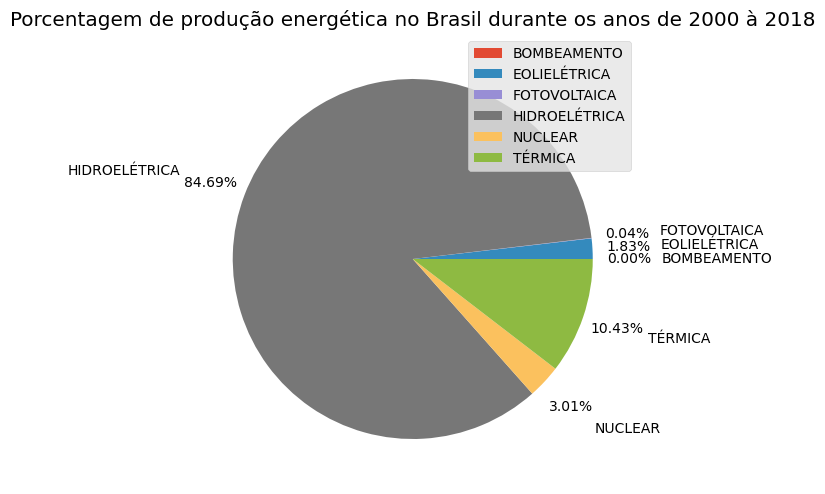

In [108]:
#Gráfico comparativo de acordo com os tipos de usina na soma total
df_tip_usina = df_mensal.groupby('nom_tipousina').sum()
df_tip_usina['porcentagem'] = df_tip_usina['val_geracao'] / df_tip_usina['val_geracao'].sum() * 100
df_tip_usina = df_tip_usina.drop(columns=['ano','mes'])
plt.pie(df_tip_usina['porcentagem'], labels=df_tip_usina.index, autopct='%.2f%%',pctdistance=1.2,labeldistance=1.38,textprops={'fontsize': 10})
plt.tight_layout()
plt.legend(df_tip_usina.index, loc='upper right', fontsize=10)
plt.title('Porcentagem de produção energética no Brasil durante os anos de 2000 à 2018')
#plt.savefig('grafico2.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

In [109]:
#Produção anual de acordo com o tipo de usina
df_producao_anual = df_mensal.groupby(['ano','nom_tipousina']).sum().reset_index()
df_producao_anual = df_producao_anual.sort_values(by=['nom_tipousina','ano'], ascending=True).reset_index(drop=True)
df_producao_anual = df_producao_anual.drop(columns='mes')
df_producao_anual

,ano,nom_tipousina,val_geracao
0,2014,BOMBEAMENTO,0.000000e+00
1,2015,BOMBEAMENTO,0.000000e+00
2,2016,BOMBEAMENTO,1.869920e+02
3,2006,EOLIELÉTRICA,2.375018e+05
4,2007,EOLIELÉTRICA,5.589134e+05
...,...,...,...
72,2014,TÉRMICA,1.211505e+08
73,2015,TÉRMICA,1.209632e+08
74,2016,TÉRMICA,8.261967e+07
75,2017,TÉRMICA,9.787986e+07


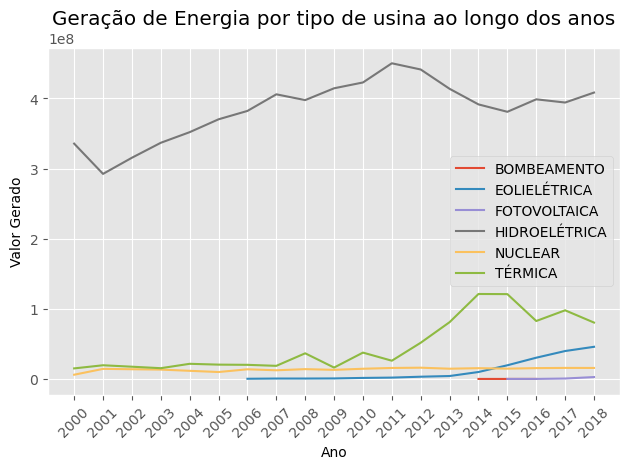

In [110]:
#Criando gráfico anual para verificar a geração de energia
for usina in df_producao_anual['nom_tipousina'].unique():
    data = df_producao_anual[df_producao_anual['nom_tipousina'] == usina]
    plt.plot(data['ano'], data['val_geracao'], label=usina)

plt.style.use('ggplot')
plt.title('Geração de Energia por tipo de usina ao longo dos anos')
plt.xlabel('Ano')
plt.xticks(range(df_producao_anual['ano'].min(), df_producao_anual['ano'].max() + 1),rotation = 45)
plt.ylabel('Valor Gerado')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('grafico3.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

### 3ª Fase - Modelo preditivo dos dados

In [111]:
#Ao analisar os dados anteriores, o BOMBEAMENTO será desconsiderado, já que teve início e fim.
## Método utilizado - ARIMA: Método estatístico de autoregressão e médias móveis para previsão de séries temporais

#AIC: Critério de informação Akaike - avaliar a qualidade do modelo estatístico, quanto menor, melhor.
#m: Definido o período de sazonalidade (12 meses)
#P: Valor inicial da porção auto-regressiva (prever valores futuros de acordo com os passados) do modelo sazonal
#D: Ordem da diferenciação sazonal 
#trace = Realizar print de todas as tentativas, inclusive valores falsos
#error_action: Controla o tratamento de erros

#ARIMA (p,d,q)
#p: Número de lags do modelo (defasagem)
#d: Número de vezes que a observação será diferenciada
#q: Ordem de média móvel

In [112]:
#Filtrando o DataFrame para manter apenas os dados de EOLIELÉTRICA
df_eoli = df[df['nom_tipousina'] == 'EOLIELÉTRICA']
eoli_group = df_eoli.groupby(['ano', 'mes']).sum()
eoli_group


C:\Users\marce\AppData\Local\Temp\ipykernel_1392\2515185845.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eoli_group = df_eoli.groupby(['ano', 'mes']).sum()


val_geracao
ano  mes              
2006 3    9.710000e+00
     4    3.441800e+02
     5    1.724670e+03
     6    8.398590e+03
     7    1.796663e+04
...                ...
2018 8    4.966604e+06
     9    5.253124e+06
     10   4.519506e+06
     11   4.881572e+06
     12   3.564527e+06

[154 rows x 1 columns]

In [113]:
#Aplicando o auto_arima para a descoberta do p,d,q e AIC - EOLI
eoli_arima = auto_arima(eoli_group,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings='True',stepwise='False')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3905.048, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3936.627, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3902.966, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3903.652, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3908.001, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3904.889, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3904.942, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3903.595, Time=0.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=3904.701, Time=0.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3924.542, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3903.981, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3904.329, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3903.115, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=3905.865, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0

In [114]:
#Analisando o AIC para avaliação do modelo (Ajuste e complexidade, para comparar modelos)
print(eoli_arima.aic())

3902.965875966234


In [115]:
#Treinando a máquina para as datas entre 2006 e 2018-12 utilizando os parâmetros do modelo ARIMA (treinamento supervisionado com ajuste fit)
train_eoli = eoli_group.loc['2006':'2018']
eoli_arima.fit(train_eoli)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings='True', with_intercept=False)

In [116]:
#Aplicando o modelo de treinamento para 24 meses e organizando a tabela
eoli_prev = eoli_arima.predict(n_periods=24)
eoli_prev = eoli_prev.reset_index()
eoli_prev['index'] = pd.date_range(start='2019-01-01', end='2020-12-31', freq='MS')
eoli_prev['nom_tipousina'] = pd.DataFrame({'EOLIELÉTRICA': ['EOLIELÉTRICA'] * 24})
eoli_prev.set_index('index',inplace=True,drop=True)
eoli_prev['ano'] = eoli_prev.index.year
eoli_prev['mes'] = eoli_prev.index.month
eoli_prev.rename(columns={0:'val_geracao_prev'}, inplace=True)
#eoli_prev = eoli_prev.groupby(['nom_tipousina', 'ano', 'mes']).sum()
eoli_prev

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,val_geracao_prev,nom_tipousina,ano,mes
index,,,,
2019-01-01,3.788910e+06,EOLIELÉTRICA,2019,1
2019-02-01,2.546277e+06,EOLIELÉTRICA,2019,2
2019-03-01,2.690038e+06,EOLIELÉTRICA,2019,3
2019-04-01,3.099055e+06,EOLIELÉTRICA,2019,4
2019-05-01,3.864288e+06,EOLIELÉTRICA,2019,5
2019-06-01,4.445083e+06,EOLIELÉTRICA,2019,6
2019-07-01,5.141690e+06,EOLIELÉTRICA,2019,7
2019-08-01,5.299304e+06,EOLIELÉTRICA,2019,8
2019-09-01,5.690708e+06,EOLIELÉTRICA,2019,9


In [117]:
#Filtrando o DataFrame para manter apenas os dados de FOTOVOLTAICA
df_foto = df[df['nom_tipousina'] == 'FOTOVOLTAICA']
foto_group = df_foto.groupby(['ano', 'mes']).sum()
foto_group

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\1034093289.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  foto_group = df_foto.groupby(['ano', 'mes']).sum()


val_geracao
ano  mes             
2015 7         22.565
     8       1103.625
     9       1464.648
     10      1733.461
     11      1633.587
     12      1485.018
2016 1       1268.768
     2       1526.057
     3       1669.378
     4        916.964
     5       1154.372
     6       1101.478
     7       1251.472
     8       1468.047
     9       1570.780
     10      1643.870
     11      1552.932
     12      1393.111
2017 1       1570.159
     2       1355.844
     3       1186.287
     4       1168.764
     5       5798.205
     6      25368.947
     7      38936.346
     8      51745.913
     9      66592.094
     10    136056.032
     11    121813.147
     12    142918.824
2018 1     164410.117
     2     147145.743
     3     184505.052
     4     183242.541
     5     214111.315
     6     214523.925
     7     245409.270
     8     240317.069
     9     270750.601
     10    260852.931
     11    245309.114
     12    299494.345

In [118]:
#Aplicando o auto_arima para a descoberta do p,d,q e AIC - FOTO
foto_arima = auto_arima(foto_group,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings='True',stepwise='False')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=672.536, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=671.459, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=668.959, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=671.055, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=672.539, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=670.958, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=670.958, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=669.956, Time=0.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=672.958, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=669.704, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=671.526, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=670.042, Time=0.04 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=666.896, Time=0.40 sec
 ARIMA(2,1,1)(0,1,0)[12]             

In [119]:
#Analisando o AIC para avaliação do modelo
print(foto_arima.aic())

666.8955876400075


In [120]:
#Treinando a máquina para as datas entre 2015 e 2018-12 utilizando os parâmetros do modelo ARIMA
train_foto = foto_group.loc['2015':'2018']
foto_arima.fit(train_foto)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings='True', with_intercept=False)

In [121]:
#Aplicando o modelo de treinamento para 24 meses e organizando a tabela
foto_prev = foto_arima.predict(n_periods=24)
foto_prev = foto_prev.reset_index()
foto_prev['index'] = pd.date_range(start='2019-01-01', end='2020-12-31', freq='MS')
foto_prev['nom_tipousina'] = pd.DataFrame({'FOTOVOLTAICA': ['FOTOVOLTAICA'] * 24})
foto_prev.set_index('index',inplace=True,drop=True)
foto_prev['ano'] = foto_prev.index.year
foto_prev['mes'] = foto_prev.index.month
foto_prev.rename(columns={0:'val_geracao_prev'}, inplace=True)
#foto_prev = foto_prev.groupby(['nom_tipousina', 'ano', 'mes']).sum()
foto_prev

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,val_geracao_prev,nom_tipousina,ano,mes
index,,,,
2019-01-01,288074.418471,FOTOVOLTAICA,2019,1
2019-02-01,309095.425039,FOTOVOLTAICA,2019,2
2019-03-01,313216.666997,FOTOVOLTAICA,2019,3
2019-04-01,325645.607768,FOTOVOLTAICA,2019,4
2019-05-01,338235.312971,FOTOVOLTAICA,2019,5
2019-06-01,367661.900251,FOTOVOLTAICA,2019,6
2019-07-01,389773.381130,FOTOVOLTAICA,2019,7
2019-08-01,411441.083861,FOTOVOLTAICA,2019,8
2019-09-01,434648.879046,FOTOVOLTAICA,2019,9


In [122]:
#Filtrando o DataFrame para manter apenas os dados de HIDROELÉTRICA
df_hidro = df[df['nom_tipousina'] == 'HIDROELÉTRICA']
hidro_group = df_hidro.groupby(['ano', 'mes']).sum()
hidro_group

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\1636352304.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hidro_group = df_hidro.groupby(['ano', 'mes']).sum()


val_geracao
ano  mes              
2000 1    2.771126e+07
     2    2.684993e+07
     3    2.878938e+07
     4    2.781060e+07
     5    2.881339e+07
...                ...
2018 8    2.895673e+07
     9    2.764160e+07
     10   3.356723e+07
     11   3.550156e+07
     12   3.928990e+07

[228 rows x 1 columns]

In [123]:
#Aplicando o auto_arima para a descoberta do p,d,q e AIC - HIDRO
hidro_arima = auto_arima(hidro_group,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings='True',stepwise='False')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6813.616, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6840.041, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6827.489, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6812.604, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6836.191, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6796.830, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6826.240, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6796.193, Time=0.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6811.233, Time=0.26 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=6797.820, Time=1.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6796.594, Time=0.53 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=6792.679, Time=0.42 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6796.712, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6814.263, Time=0.22 sec
 ARIMA(0,1,0)(2,1,2

In [124]:
#Analisando o AIC para avaliação do modelo
print(hidro_arima.aic())

6792.678617972725


In [125]:
#Treinando a máquina para as datas entre 2000 e 2018-12 utilizando os parâmetros do modelo ARIMA
train_hidro = hidro_group.loc['2000':'2018']
hidro_arima.fit(train_hidro)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings='True', with_intercept=False)

In [126]:
#Aplicando o modelo de treinamento para 24 meses e organizando a tabela
hidro_prev = hidro_arima.predict(n_periods=24)
hidro_prev = hidro_prev.reset_index()
hidro_prev['index'] = pd.date_range(start='2019-01-01', end='2020-12-31', freq='MS')
hidro_prev['nom_tipousina'] = pd.DataFrame({'HIDROELÉTRICA': ['HIDROELÉTRICA'] * 24})
hidro_prev.set_index('index',inplace=True,drop=True)
hidro_prev['ano'] = hidro_prev.index.year
hidro_prev['mes'] = hidro_prev.index.month
hidro_prev.rename(columns={0:'val_geracao_prev'}, inplace=True)
#hidro_prev = hidro_prev.groupby(['nom_tipousina', 'ano', 'mes']).sum()
hidro_prev

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,val_geracao_prev,nom_tipousina,ano,mes
index,,,,
2019-01-01,4.246881e+07,HIDROELÉTRICA,2019,1
2019-02-01,4.033109e+07,HIDROELÉTRICA,2019,2
2019-03-01,4.436724e+07,HIDROELÉTRICA,2019,3
2019-04-01,3.965425e+07,HIDROELÉTRICA,2019,4
2019-05-01,3.877126e+07,HIDROELÉTRICA,2019,5
2019-06-01,3.557661e+07,HIDROELÉTRICA,2019,6
2019-07-01,3.615308e+07,HIDROELÉTRICA,2019,7
2019-08-01,3.636912e+07,HIDROELÉTRICA,2019,8
2019-09-01,3.523268e+07,HIDROELÉTRICA,2019,9


In [127]:
#Filtrando o DataFrame para manter apenas os dados de NUCLEAR
df_nuclear = df[df['nom_tipousina'] == 'NUCLEAR']
nuclear_group = df_nuclear.groupby(['ano', 'mes']).sum()
nuclear_group

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\2311733431.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nuclear_group = df_nuclear.groupby(['ano', 'mes']).sum()


val_geracao
ano  mes             
2000 1     418078.100
     2     400043.100
     3     400187.100
     4     358885.600
     5          0.000
...               ...
2018 8    1504327.708
     9    1448836.759
     10   1407384.982
     11    982467.253
     12   1391964.576

[228 rows x 1 columns]

In [128]:
#Aplicando o auto_arima para a descoberta do p,d,q e AIC - NUCLEAR
nuclear_arima = auto_arima(nuclear_group,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings='True',stepwise='False')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6066.411, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6200.807, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6128.437, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6080.202, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=6137.203, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=6067.874, Time=0.22 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=6067.850, Time=0.52 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=6093.576, Time=0.22 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=6069.181, Time=1.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=6095.262, Time=0.16 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=6056.314, Time=0.30 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=6128.528, Time=0.11 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=6058.126, Time=0.34 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=6058.112, Time=0.69 sec
 ARIMA(2,1,1)(1,1,0

In [129]:
#Analisando o AIC para avaliação do modelo
print(nuclear_arima.aic())

6039.299032508963


In [130]:
#Treinando a máquina para as datas entre 2000 e 2018-12 utilizando os parâmetros do modelo ARIMA
train_nuclear = nuclear_group.loc['2000':'2018']
nuclear_arima.fit(train_nuclear)

ARIMA(order=(0, 1, 4), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings='True', with_intercept=False)

In [131]:
#Aplicando o modelo de treinamento para 24 meses e organizando a tabela
nuclear_prev = nuclear_arima.predict(n_periods=24)
nuclear_prev = nuclear_prev.reset_index()
nuclear_prev['index'] = pd.date_range(start='2019-01-01', end='2020-12-31', freq='MS')
nuclear_prev['nom_tipousina'] = pd.DataFrame({'NUCLEAR': ['NUCLEAR'] * 24})
nuclear_prev.set_index('index',inplace=True,drop=True)
nuclear_prev['ano'] = nuclear_prev.index.year
nuclear_prev['mes'] = nuclear_prev.index.month
nuclear_prev.rename(columns={0:'val_geracao_prev'}, inplace=True)
#nuclear_prev = nuclear_prev.groupby(['nom_tipousina', 'ano', 'mes']).sum()
nuclear_prev

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,val_geracao_prev,nom_tipousina,ano,mes
index,,,,
2019-01-01,1.486857e+06,NUCLEAR,2019,1
2019-02-01,1.219331e+06,NUCLEAR,2019,2
2019-03-01,1.259888e+06,NUCLEAR,2019,3
2019-04-01,1.300790e+06,NUCLEAR,2019,4
2019-05-01,1.342987e+06,NUCLEAR,2019,5
2019-06-01,1.370262e+06,NUCLEAR,2019,6
2019-07-01,1.416974e+06,NUCLEAR,2019,7
2019-08-01,1.380554e+06,NUCLEAR,2019,8
2019-09-01,1.421210e+06,NUCLEAR,2019,9


In [132]:
#Filtrando o DataFrame para manter apenas os dados de TÉRMICA
df_term = df[df['nom_tipousina'] == 'TÉRMICA']
term_group = df_term.groupby(['ano', 'mes']).sum()
term_group

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\2366021141.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  term_group = df_term.groupby(['ano', 'mes']).sum()


val_geracao
ano  mes              
2000 1    1.443882e+06
     2    1.386004e+06
     3    1.280906e+06
     4    1.055892e+06
     5    1.334959e+06
...                ...
2018 8    9.194591e+06
     9    9.373720e+06
     10   7.448764e+06
     11   4.320570e+06
     12   3.991181e+06

[228 rows x 1 columns]

In [133]:
#Aplicando o auto_arima para a descoberta do p,d,q e AIC - TERM
term_arima = auto_arima(term_group,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings='True',stepwise='False')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=6449.975, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6530.282, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6475.253, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6449.657, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6524.753, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6450.506, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6450.305, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6475.142, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=6447.513, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6443.619, Time=0.21 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=6469.240, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=6439.812, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6441.946, Time=0.25 sec
 ARIMA(0,1,0)(2,1,2)[12]

In [134]:
#Analisando o AIC para avaliação do modelo
print(term_arima.aic())

6439.812258120495


In [135]:
#Treinando a máquina para as datas entre 2000 e 2018-12 utilizando os parâmetros do modelo ARIMA
train_term = term_group.loc['2000':'2018']
term_arima.fit(train_term)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings='True', with_intercept=False)

In [136]:
#Aplicando o modelo de treinamento para 24 meses e organizando a tabela
term_prev = term_arima.predict(n_periods=24)
term_prev = term_prev.reset_index()
term_prev['index'] = pd.date_range(start='2019-01-01', end='2020-12-31', freq='MS')
term_prev['nom_tipousina'] = pd.DataFrame({'TÉRMICA': ['TÉRMICA'] * 24})
term_prev.set_index('index',inplace=True,drop=True)
term_prev['ano'] = term_prev.index.year
term_prev['mes'] = term_prev.index.month
term_prev.rename(columns={0:'val_geracao_prev'}, inplace=True)
term_prev

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,val_geracao_prev,nom_tipousina,ano,mes
index,,,,
2019-01-01,3.266988e+06,TÉRMICA,2019,1
2019-02-01,2.588475e+06,TÉRMICA,2019,2
2019-03-01,3.288930e+06,TÉRMICA,2019,3
2019-04-01,2.687023e+06,TÉRMICA,2019,4
2019-05-01,3.387934e+06,TÉRMICA,2019,5
2019-06-01,3.359689e+06,TÉRMICA,2019,6
2019-07-01,3.754927e+06,TÉRMICA,2019,7
2019-08-01,4.734588e+06,TÉRMICA,2019,8
2019-09-01,4.821030e+06,TÉRMICA,2019,9


In [137]:
total_prev = pd.concat([term_prev, eoli_prev, hidro_prev, nuclear_prev, foto_prev])
total_prev = total_prev.reset_index(drop=True)
total_prev

,val_geracao_prev,nom_tipousina,ano,mes
0,3.266988e+06,TÉRMICA,2019,1
1,2.588475e+06,TÉRMICA,2019,2
2,3.288930e+06,TÉRMICA,2019,3
3,2.687023e+06,TÉRMICA,2019,4
4,3.387934e+06,TÉRMICA,2019,5
...,...,...,...,...
115,6.882167e+05,FOTOVOLTAICA,2020,8
116,7.248358e+05,FOTOVOLTAICA,2020,9
117,7.209649e+05,FOTOVOLTAICA,2020,10
118,7.112930e+05,FOTOVOLTAICA,2020,11


### 4ª Fase - Métricas de avaliação do modelo e importância das variáveis

In [138]:
#Para realização da avaliação do modelo, será realizado um comparativo com os anos de 2019 e 2020 já existentes
#Diretório dos arquivos CSV
diretorio_prova = glob.glob(r'C:\Users\marce\Downloads\Bootcamp\Validação\*.csv')

In [139]:
#Lista para armazenar os DF's 2019 e 2020
dfs_2019_2020 = []

In [140]:
#Armazenar os arquivos na lista
for arquivo in diretorio_prova:
    df_2019_2020 = pd.read_csv(arquivo,delimiter = ';', index_col = 0, parse_dates = True, usecols=['din_instante','nom_subsistema','nom_estado','nom_tipousina','nom_usina','val_geracao'])
    dfs_2019_2020.append(df_2019_2020)

In [141]:
#Concatenando os dfs em uma lista só
df_19_20 = pd.concat(dfs_2019_2020)

In [142]:
#Criação da coluna 'ano' e 'mes'
df_19_20['ano'] = df_19_20.index.year
df_19_20['mes'] = df_19_20.index.month
df_19_20

,nom_subsistema,nom_estado,nom_tipousina,nom_usina,val_geracao,ano,mes
din_instante,,,,,,,
2019-01-01 00:00:00,NORTE,AMAZONAS,HIDROELÉTRICA,Balbina,82.993,2019,1
2019-01-01 00:00:00,NORTE,AMAZONAS,TÉRMICA,Flores 4,14.032,2019,1
2019-01-01 00:00:00,NORTE,AMAZONAS,TÉRMICA,Ponta Negra,65.343,2019,1
2019-01-01 00:00:00,NORTE,AMAZONAS,TÉRMICA,Tambaqui,50.980,2019,1
2019-01-01 00:00:00,NORTE,AMAZONAS,TÉRMICA,Distrito A,0.000,2019,1
...,...,...,...,...,...,...,...
2020-12-31 23:00:00,SUDESTE,SAO PAULO,TÉRMICA,Fartura,29.000,2020,12
2020-12-31 23:00:00,SUDESTE,SAO PAULO,TÉRMICA,Guaíra Energética,24.000,2020,12
2020-12-31 23:00:00,SUDESTE,TOCANTINS,HIDROELÉTRICA,São Salvador,80.430,2020,12


In [143]:
#Fazendo a tabela com a divisão temporal dos dados de acordo com o tipo de usina
usina_temporal_19_20 = df_19_20.groupby(['nom_tipousina', 'ano', 'mes']).sum()
usina_temporal_19_20 = usina_temporal_19_20.reset_index()
usina_temporal_19_20

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\2500237190.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usina_temporal_19_20 = df_19_20.groupby(['nom_tipousina', 'ano', 'mes']).sum()


,nom_tipousina,ano,mes,val_geracao
0,EOLIELÉTRICA,2019,1,4.145511e+06
1,EOLIELÉTRICA,2019,2,2.175545e+06
2,EOLIELÉTRICA,2019,3,2.532265e+06
3,EOLIELÉTRICA,2019,4,2.572867e+06
4,EOLIELÉTRICA,2019,5,3.812162e+06
...,...,...,...,...
115,TÉRMICA,2020,8,4.941010e+06
116,TÉRMICA,2020,9,4.631216e+06
117,TÉRMICA,2020,10,9.141559e+06
118,TÉRMICA,2020,11,1.016766e+07


(0.0, 50000000.0)

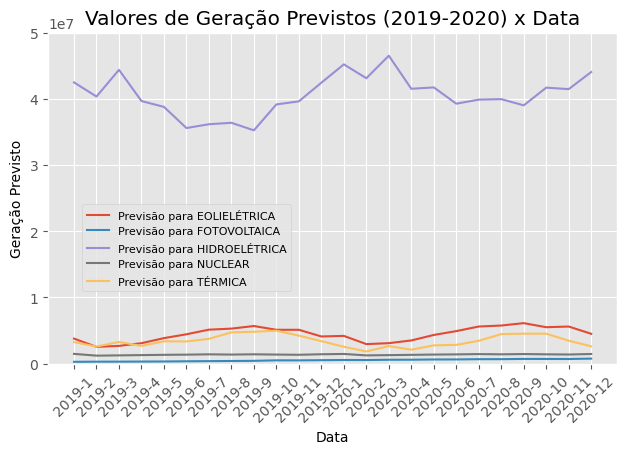

In [144]:
#Separando por tipo de usina(previsto) e preparando para plotar todos em um só gráfico
#Importância das variáveis val_geracao e val_geracao_prev, além de data e nom_tipousina
prev_usinas = sorted(total_prev['nom_tipousina'].unique())
fig, ax = plt.subplots()
for usina in prev_usinas:
    total_prev_tipo = total_prev[total_prev['nom_tipousina'] == usina]
    total_prev_tipo = total_prev_tipo.set_index(['ano', 'mes'])
    datas = [f"{ano}-{mes}" for ano, mes in total_prev_tipo.index]
    ax.plot(datas, total_prev_tipo['val_geracao_prev'], label=f'Previsão para {usina}')
ax.set_xlabel('Data')
ax.set_ylabel('Geração Previsto')
ax.set_title('Valores de Geração Previstos (2019-2020) x Data')
ax.legend(loc='center left', fontsize = 8, bbox_to_anchor=(0.05, 0.35))
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,5e7)
#plt.savefig('grafico4.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

(0.0, 50000000.0)

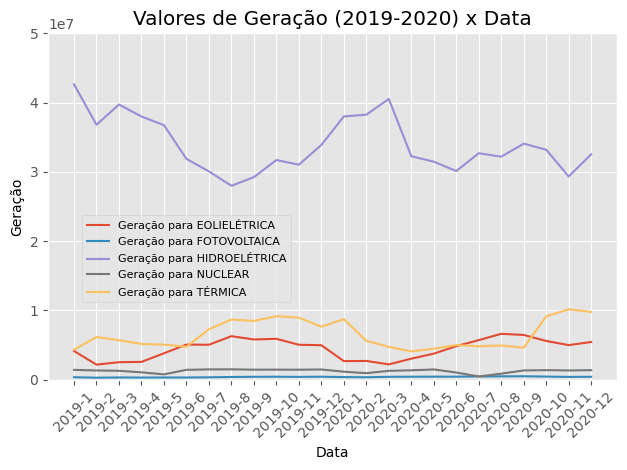

In [145]:
#Separando por tipo de usina(gerado) e preparando para plotar todos em um só gráfico
prev_usinas2 = usina_temporal_19_20['nom_tipousina'].unique()
fig, ax = plt.subplots()
for usina in prev_usinas2:
    usina_temp_tipo = usina_temporal_19_20[usina_temporal_19_20['nom_tipousina'] == usina]
    usina_temp_tipo = usina_temp_tipo.set_index(['ano', 'mes'])
    datas = [f"{ano}-{mes}" for ano, mes in usina_temp_tipo.index]
    ax.plot(datas, usina_temp_tipo['val_geracao'], label=f'Geração para {usina}')
ax.set_xlabel('Data')
ax.set_ylabel('Geração')
ax.set_title('Valores de Geração (2019-2020) x Data')
ax.legend(loc='center left', fontsize = 8, bbox_to_anchor=(0.05, 0.35))
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,5e7)
#plt.savefig('grafico5.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'Porcentagem prevista de produção energética no Brasil durante os anos de 2019 e 2020')

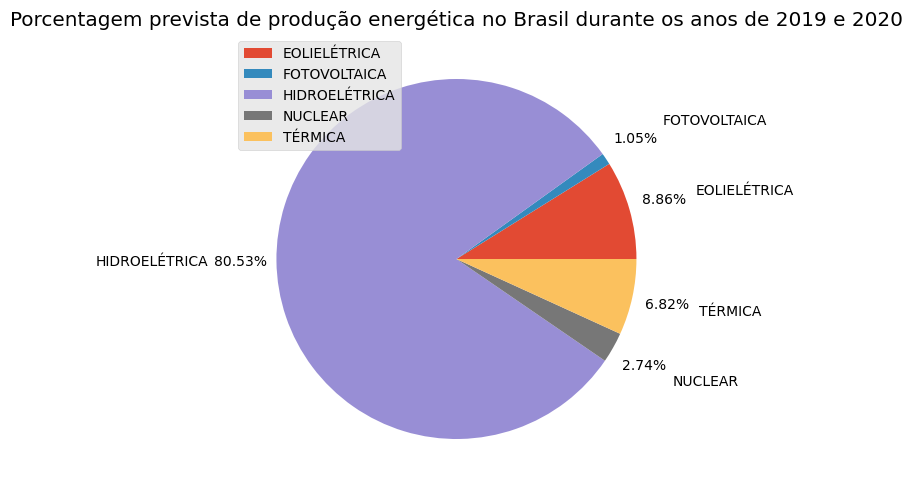

In [146]:
#Gráfico comparativo de acordo com os tipos de usina na soma total (prev)
#Importância das variáveis nom_tipousina e porcentagem de val_geracao e val_geracao_prev
df_pizzaprev = total_prev.groupby('nom_tipousina').sum()
df_pizzaprev['porcentagem'] = df_pizzaprev['val_geracao_prev'] / df_pizzaprev['val_geracao_prev'].sum() * 100
df_pizzaprev = df_pizzaprev.drop(columns=['ano','mes'])
plt.pie(df_pizzaprev['porcentagem'], labels=df_pizzaprev.index, autopct='%.2f%%',pctdistance=1.2,labeldistance=1.38,textprops={'fontsize': 10})
plt.tight_layout()
plt.legend(df_pizzaprev.index, loc='upper left', fontsize=10)
plt.title('Porcentagem prevista de produção energética no Brasil durante os anos de 2019 e 2020')
#plt.savefig('grafico6.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'Porcentagem de produção energética no Brasil durante os anos de 2019 e 2020')

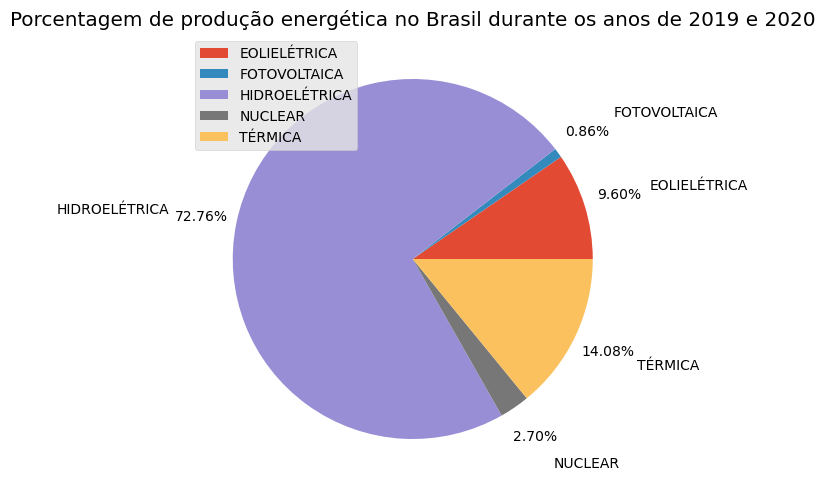

In [147]:
#Gráfico comparativo de acordo com os tipos de usina na soma total (real)
df_ger19 = usina_temporal_19_20.groupby('nom_tipousina').sum()
df_ger19['porcentagem'] = df_ger19['val_geracao'] / df_ger19['val_geracao'].sum() * 100
df_ger19 = df_ger19.drop(columns=['ano','mes'])
plt.pie(df_ger19['porcentagem'], labels=df_ger19.index, autopct='%.2f%%',pctdistance=1.2,labeldistance=1.38,textprops={'fontsize': 10})
plt.tight_layout()
plt.legend(df_ger19.index, loc='upper left', fontsize=10)
plt.title('Porcentagem de produção energética no Brasil durante os anos de 2019 e 2020')
#plt.savefig('grafico7.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

In [148]:
#Somatório ano-mês previsto 19/20
df_sum2 = total_prev.groupby(['ano', 'mes']).sum()['val_geracao_prev'].reset_index()
df_sum2['data'] = df_sum2['ano'].astype(str) + '-' + df_sum2['mes'].astype(str)
df_sum2.set_index('data', inplace=True)
df_sum2.drop(['ano', 'mes'], axis=1, inplace=True)
df_sum2

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\4013229639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum2 = total_prev.groupby(['ano', 'mes']).sum()['val_geracao_prev'].reset_index()


,val_geracao_prev
data,
2019-1,5.129964e+07
2019-2,4.699427e+07
2019-3,5.191931e+07
2019-4,4.706676e+07
2019-5,4.770470e+07
2019-6,4.511930e+07
2019-7,4.685645e+07
2019-8,4.819501e+07
2019-9,4.760027e+07


In [149]:
#Somatório ano-mês gerado 19/20
df_sum3 = usina_temporal_19_20.groupby(['ano', 'mes']).sum()['val_geracao'].reset_index()
df_sum3['data'] = df_sum3['ano'].astype(str) + '-' + df_sum3['mes'].astype(str)
df_sum3.set_index('data', inplace=True)
df_sum3.drop(['ano', 'mes'], axis=1, inplace=True)
df_sum3

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\3667656901.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum3 = usina_temporal_19_20.groupby(['ano', 'mes']).sum()['val_geracao'].reset_index()


,val_geracao
data,
2019-1,5.289974e+07
2019-2,4.677415e+07
2019-3,4.957229e+07
2019-4,4.711745e+07
2019-5,4.672159e+07
2019-6,4.346232e+07
2019-7,4.424661e+07
2019-8,4.486582e+07
2019-9,4.541197e+07


In [150]:
df_sums = pd.concat([df_sum3,df_sum2],axis=1)
df_sums['variacao_do_real'] = (df_sums['val_geracao_prev']-df_sums['val_geracao'])*100/df_sums['val_geracao']
df_sums['variacao_do_real'] = df_sums['variacao_do_real'].round(2)
df_sums['variacao_do_real'] = df_sums['variacao_do_real'].map('{:.2f}%'.format)
df_sums

,val_geracao,val_geracao_prev,variacao_do_real
data,,,
2019-1,5.289974e+07,5.129964e+07,-3.02%
2019-2,4.677415e+07,4.699427e+07,0.47%
2019-3,4.957229e+07,5.191931e+07,4.73%
2019-4,4.711745e+07,4.706676e+07,-0.11%
2019-5,4.672159e+07,4.770470e+07,2.10%
2019-6,4.346232e+07,4.511930e+07,3.81%
2019-7,4.424661e+07,4.685645e+07,5.90%
2019-8,4.486582e+07,4.819501e+07,7.42%
2019-9,4.541197e+07,4.760027e+07,4.82%


Text(0.5, 0, 'Variação do Real')

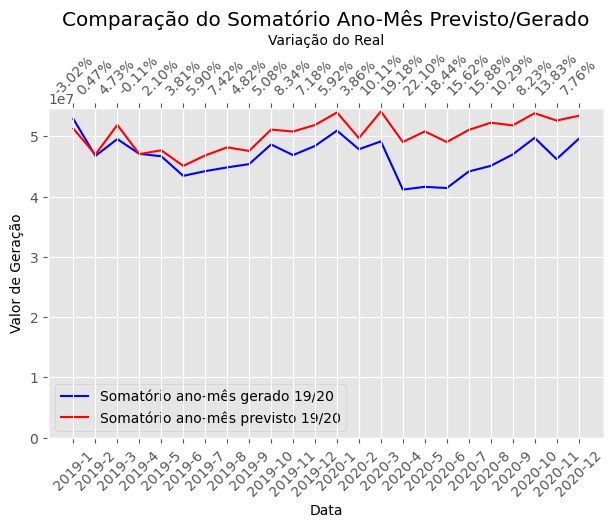

In [151]:
plt.plot(df_sums.index,df_sums['val_geracao'], color = 'blue')
plt.plot(df_sums.index,df_sums['val_geracao_prev'], color = 'red')
plt.title('Comparação do Somatório Ano-Mês Previsto/Gerado')
plt.xlabel('Data')
plt.ylabel('Valor de Geração')
plt.legend(['Somatório ano-mês gerado 19/20','Somatório ano-mês previsto 19/20'])
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0)

#Rótulo do eixo x na parte superior com "variacao_do_real"
#Importância da comparação para métricas de avaliação
ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(range(len(df_sums)))
ax2.set_xticklabels(df_sums['variacao_do_real'], rotation=45 )
ax2.set_xlabel('Variação do Real')
#plt.savefig('grafico8.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)

In [152]:
#Verificando a produção prevista para comparação
df_sum_anual_prev = total_prev.groupby(['ano']).sum()
df_sum_anual_prev = df_sum_anual_prev.drop(columns=['mes'])
df_sum_anual_prev

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\2367388075.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum_anual_prev = total_prev.groupby(['ano']).sum()


,val_geracao_prev
ano,
2019,5.866294e+08
2020,6.220426e+08


In [153]:
#Verificando a produção anual gerada para comparação
df_sum_anual_ger = usina_temporal_19_20.groupby(['ano']).sum()
df_sum_anual_ger = df_sum_anual_ger.drop(columns=['mes'])
df_sum_anual_ger

C:\Users\marce\AppData\Local\Temp\ipykernel_1392\1138081743.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum_anual_ger = usina_temporal_19_20.groupby(['ano']).sum()


,val_geracao
ano,
2019,5.650856e+08
2020,5.542203e+08


In [154]:
#Verificando a produção por usina prevista para análise
df_sumprev = total_prev.groupby('nom_tipousina').sum()['val_geracao_prev'].reset_index()
df_sumprev = df_sumprev.set_index('nom_tipousina')
df_sumprev

,val_geracao_prev
nom_tipousina,
EOLIELÉTRICA,1.071225e+08
FOTOVOLTAICA,1.264913e+07
HIDROELÉTRICA,9.733264e+08
NUCLEAR,3.313508e+07
TÉRMICA,8.243887e+07


In [155]:
#Verificando a produção por usina gerada para análise
df_sumger = usina_temporal_19_20.groupby(['nom_tipousina']).sum()['val_geracao'].reset_index()
df_sumger = df_sumger.set_index('nom_tipousina')
df_sumger

,val_geracao
nom_tipousina,
EOLIELÉTRICA,1.074851e+08
FOTOVOLTAICA,9.614068e+06
HIDROELÉTRICA,8.144198e+08
NUCLEAR,3.017761e+07
TÉRMICA,1.576093e+08


In [156]:
df_sumgeral = pd.concat([df_sumger,df_sumprev],axis=1)
df_sumgeral

,val_geracao,val_geracao_prev
nom_tipousina,,
EOLIELÉTRICA,1.074851e+08,1.071225e+08
FOTOVOLTAICA,9.614068e+06,1.264913e+07
HIDROELÉTRICA,8.144198e+08,9.733264e+08
NUCLEAR,3.017761e+07,3.313508e+07
TÉRMICA,1.576093e+08,8.243887e+07


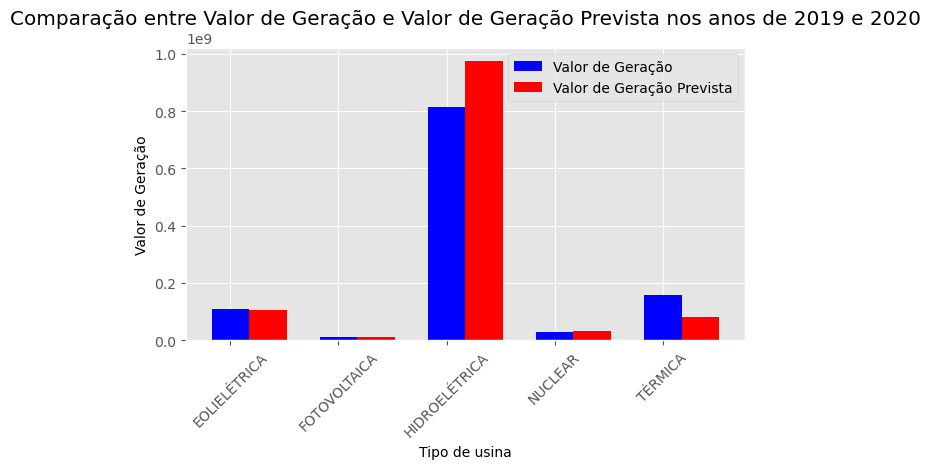

In [157]:
# Plotar as barras 'val_geracao'
#Comparativo em relação ao nom_tipousina e val_geracao com val_geracao_prev
plt.bar(df_sumgeral.index, df_sumgeral['val_geracao'], width=0.35, label='Valor de Geração', color = 'blue')
plt.bar([i + 0.35 for i in range(len(df_sumgeral))], df_sumgeral['val_geracao_prev'], width=0.35, label='Valor de Geração Prevista', color = 'red')
plt.xlabel('Tipo de usina')
plt.ylabel('Valor de Geração')
plt.title('Comparação entre Valor de Geração e Valor de Geração Prevista nos anos de 2019 e 2020')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig('grafico9.jpg',dpi=400, bbox_inches='tight', pad_inches=0.1)